# 6주차 스터디 

    1. 시계열 데이터 다루기 
    
    2. 주성분분석 (PCA)

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

### 1. 시계열 데이터 다루기 

    시계열 데이터의 누락값(NaN) 처리

* Forward Fill / Back Fill -> 시계열은 보통 ffill을 사용
* Moving average -> 노이즈가 많은 데이터인 경우
* Interpolation -> 데이터 생성 과정에 대한 이해가 있는 경우 (Linear, Polynomial, Spline 등이 있음)

In [2]:
# 데이터를 불러오겠습니다
samsung = pd.read_csv("삼성전자주가.csv", index_col=0,
                 parse_dates=True)

# Close(종가)만 사용하겠습니다
samsung_close = samsung[["Close"]].copy() #여기 처음부터 copy하지 말고, 밑 줄에서 np.nan으로 변경하고 copy 해주기
samsung_close

,Close
Date,
2019-01-02,38750
2019-01-03,37600
2019-01-04,37450
2019-01-07,38750
2019-01-08,38100
...,...
2022-12-23,58100
2022-12-26,57900
2022-12-27,58100


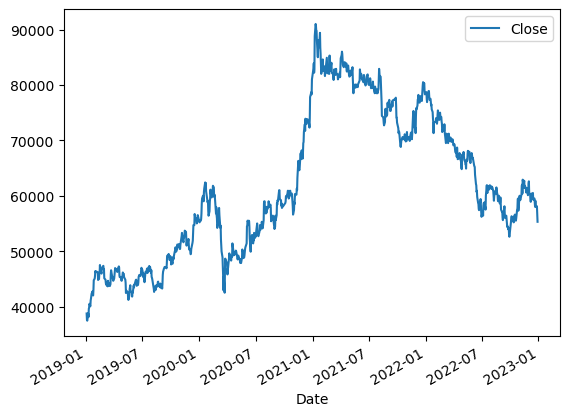

In [3]:
samsung_close.plot();

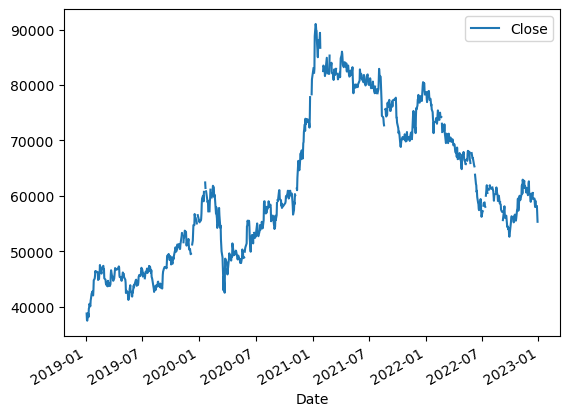

In [4]:
# 임의로 50개의 값을 누락시켜보겠습니다
idx = np.random.randint(0,len(samsung_close), 50)
samsung_close.iloc[idx] = np.nan

# 시각화 해 보겠습니다(주가가 빈 곳들이 눈에 들어옵니다)
samsung_close.plot();

In [5]:
# Forward Fill(현재의 값을 Forward함)
samsung_close["ffill"] = samsung_close.ffill()

In [6]:
# Back Fill(미래의 값을 Back 시킴)
samsung_close["bfill"] = samsung_close.Close.bfill()

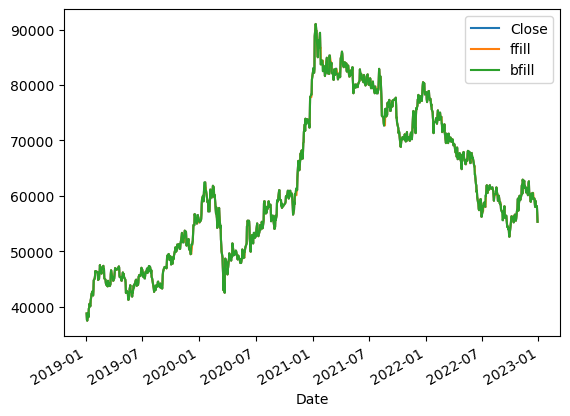

In [7]:
samsung_close.plot();

In [8]:
# 이동평균 -> 노이즈가 많은 데이터인 경우 포워드필 보다는 이동평균을 사용해야 한다(평균은 노이즈의 일부를 제거할 수 있다)
ma = samsung_close.Close.rolling(window=3, min_periods=1).mean()
ma

Date
2019-01-02    38750.000000
2019-01-03    38175.000000
2019-01-04    37933.333333
2019-01-07    37933.333333
2019-01-08    38100.000000
                  ...     
2022-12-23    58400.000000
2022-12-26    58600.000000
2022-12-27    58100.000000
2022-12-28    57350.000000
2022-12-29    56666.666667
Name: Close, Length: 988, dtype: float64

In [9]:
samsung_close.Close.fillna(ma)

Date
2019-01-02    38750.0
2019-01-03    37600.0
2019-01-04    37450.0
2019-01-07    38750.0
2019-01-08    38100.0
               ...   
2022-12-23    58100.0
2022-12-26    58600.0
2022-12-27    58100.0
2022-12-28    56600.0
2022-12-29    55300.0
Name: Close, Length: 988, dtype: float64

In [10]:
# 보간법
# 이미 알고 있는 지식에 기반하여 특정한 경향을 사용하게끔 제한할 수 있다. -> 시간에 따라 시스템이 동작하는 방식을 알고 있고, 그 지식을 활용할 때 특히 유용한 방식이다
samsung_close.Close.interpolate("linear")

Date
2019-01-02    38750.0
2019-01-03    37600.0
2019-01-04    37450.0
2019-01-07    38750.0
2019-01-08    38100.0
               ...   
2022-12-23    58100.0
2022-12-26    58100.0
2022-12-27    58100.0
2022-12-28    56600.0
2022-12-29    55300.0
Name: Close, Length: 988, dtype: float64

    시계열 분해

In [31]:
# 데이터 불러오기
air = pd.read_csv("https://raw.githubusercontent.com/PracticalTimeSeriesAnalysis/BookRepo/master/Ch02/data/AirPassengers.csv",
                  names=['Date', 'Passengers'], index_col=0, parse_dates=True)
air.head()

,Passengers
Date,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


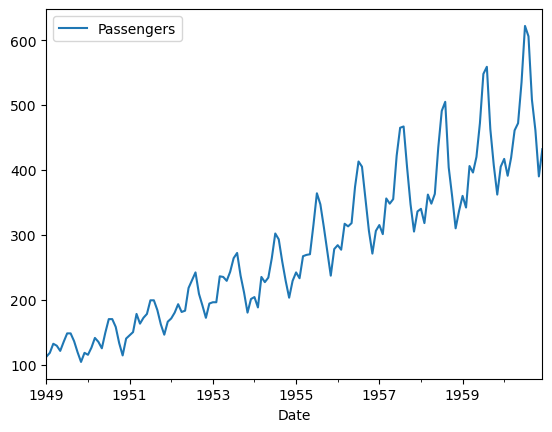

In [32]:
air.plot();

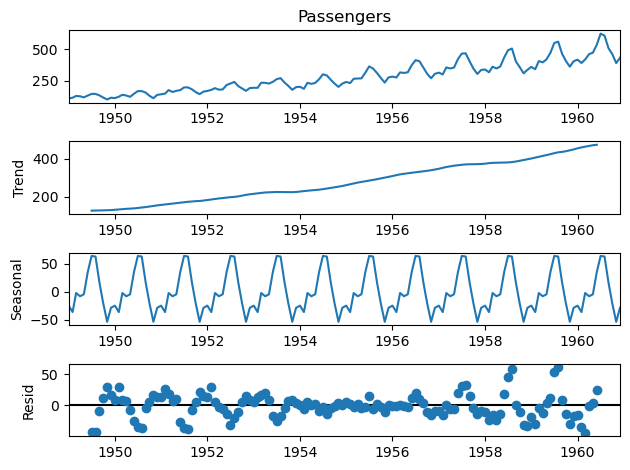

In [33]:
# 시계열 자료를 추세, 계절적 요소, 잔차로 분해해보자
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(air.Passengers, model='additive')
result.plot(); # ; 을 안주면 plot 두 개를 출력...

In [34]:
result.trend[10:20]  #  trend, seasonal, resid  출력가능   

Date
1949-11-01    129.000000
1949-12-01    129.750000
1950-01-01    131.250000
1950-02-01    133.083333
1950-03-01    134.916667
1950-04-01    136.416667
1950-05-01    137.416667
1950-06-01    138.750000
1950-07-01    140.916667
1950-08-01    143.166667
Name: trend, dtype: float64

    시계열 평활

Moving Average를 그려보겠습니다

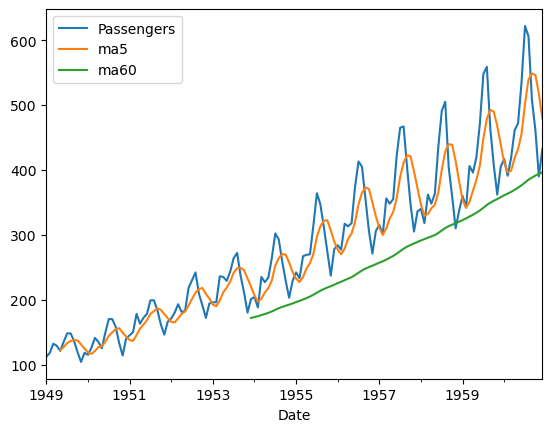

In [35]:
air["ma5"] = air["Passengers"].rolling(window=5).mean()
air["ma60"] = air["Passengers"].rolling(window=60).mean()

air.plot();

### 2. 주성분분석(PCA)

* 차원축소의 기법 중 하나

* 데이터의 분산을 최대한 보존하는 방향으로 데이터의 차원을 축소

* 차원을 축소시키고 학습하면 학습 시간이 줄어든다는 장점이 있다. 하지만, 정확도는 감소한다 (항상 그렇진 않다)

* 매우 중요한 알고리즘이나 설명력이 중요한 금융 데이터에서는 잘 사용되지 않음

In [15]:
# 3차원 데이터 생성
m = 1000
w1, w2 = 0.1, 0.3
noise = 0.1

angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
X = np.empty((m, 3))
X[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
X[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * np.random.randn(m)

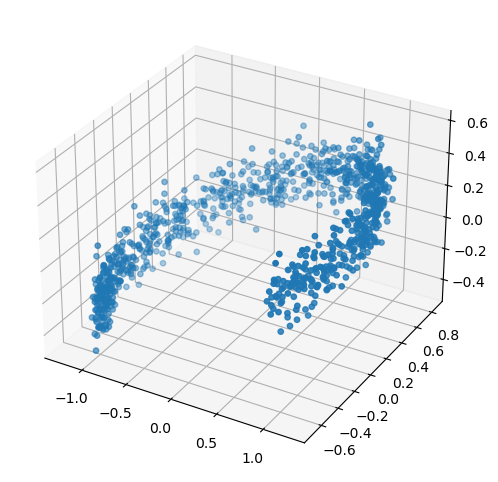

In [16]:
# 3차원 데이터를 시각화 해봅시다
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], X[:,2], marker='o', s=15);

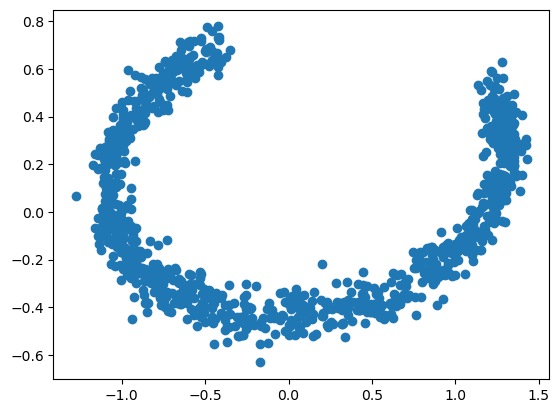

In [17]:
# 싸이킷런을 사용한 PCA
from sklearn.decomposition import PCA

# 두 개의 차원으로 축소
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.scatter(X_pca[:,0], X_pca[:,1]);

In [18]:
pca.explained_variance_ratio_ , sum(pca.explained_variance_ratio_)

(array([0.85991636, 0.13116647]), 0.9910828263397471)

    PCA로 차원을 줄인 데이터셋 VS 일반 데이터셋

In [19]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

# Mnist 데이터셋을 불러온다
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.target = mnist.target.astype(np.uint8)

X = mnist["data"]
y = mnist["target"]

# Train_set과 Test-set으로 분리한다
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [20]:
# PCA로 차원을 축소한다
pca = PCA(n_components=0.95) # 분산의 95%를 보전
X_reduced = pca.fit_transform(X_train)
X_test_reduced = pca.transform(X_test)

In [21]:
# 그냥 학습하는 경우 (로지스틱 회귀?)
import time
from sklearn.linear_model import LogisticRegression

# 정답지가 여러개가 있는 multiclass라서 "다중 분류" 문제
log_clf = LogisticRegression(multi_class="multinomial")

t0 = time.time()
log_clf.fit(X_train, y_train)
t1 = time.time()

# 걸린시간 출력
print(t1-t0)

8.638360977172852


c:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [22]:
# 정확도 확인
log_clf.score(X_test, y_test)

0.9175428571428571

In [23]:
# PCA로 차원을 줄인 데이터로 학습할 경우
log_clf_pca = LogisticRegression(multi_class="multinomial")

t0 = time.time()
log_clf_pca.fit(X_reduced, y_train)
t1 = time.time()

# 걸린시간 출력
print(t1-t0)

4.312724590301514


c:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [24]:
# PCA로 차원을 축소시킨 모형의 정확도 확인
log_clf_pca.score(X_test_reduced, y_test)

0.9134285714285715